# Washington DC Residential Analysis

Washington, D.C. is the capital of the United States. Washington's population is approaching 700,000 people, and has been growing since 2000 following a half-century of population decline. The city is highly segregated and features a high cost of living. In 2017, the average price of a single family home in the district was $649,000. This dataset provides insight on the housing stock of the district.

> **All data is available at Open Data D.C.. The residential and address point data is managed by the Office of the Chief Technology Officer**

**Explanation about this data**
<br>
There are variables not included for predict in this raw dataset. Here is an explanation about this data.
* <b>BATHRM</b> - Number of Full Bathrooms
* <b>HF_BATHRM</b> - Number of Half Bathrooms (no bathtub or shower)
* <b>HEAT</b> - Water Heater for bathrooms
* <b>AC</b>  - Cooling rooms
* <b>NUM_UNITS</b> - Number of Units
* <b>ROOMS</b> - Number of Rooms
* <b>BEDRM</b> - Number of Bedrooms
* <b>AYB</b> - The earliest time the main portion of the building was built
* <b>YR_RMDL</b> - Year structure was remodeled
* <b>EYB</b> - The year an improvement was built more recent than actual year built
* <b>STORIES</b> - Number of stories in primary dwelling
* <b>SALEDATE</b> - Date of most recent sale
* <b>PRICE</b> - Price of most recent sale
* <b>QUALIFIED</b> - According to government staff, this is an internally-used indicator to reflect if a sale is representative of market value according to the office's internal criteria (for example, if it is part of a multi-parcel sale). U (Qualified) & Q (Qualified)
* <b>SALE_NUM</b> - Sale Number
* <b>GBA</b> - Gross building area in square feet
* <b>BLDG_NUM</b> - Building Number on Property
* <b>STYLE</b> - Style
* <b>STRUCT</b> - Structure
* <b>GRADE</b> - Grade
* <b>CNDTN</b> - Condition property
* <b>EXTWALL</b> - Extrerior wall
* <b>ROOF</b> - Roof type
* <b>INTWALL</b> - Interior wall
* <b>KITCHEN</b> - Number of kitchens
* <b>FIREPLACES</b> - Number of fireplaces
* <b>LANDARE</b> - Land area of property in square feet
* <b>WARD</b> - Ward (District is divided into eight wards, each with approximately 75,000 residents)

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
import warnings
warnings.filterwarnings('ignore')

In [68]:
df = pd.read_csv('DC_Properties.csv')

In [3]:
df.head()

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
0,0,4,0,Warm Cool,Y,2.0,8,4,1910.0,1988.0,1972,3.0,2003-11-25 00:00:00,1095000.0,Q,1,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2.0,5,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1748 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23061 09289,38.914680,-77.040832,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
1,1,3,1,Warm Cool,Y,2.0,11,5,1898.0,2007.0,1972,3.0,2000-08-17 00:00:00,NaN,U,1,2567.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1746 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23067 09289,38.914683,-77.040764,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
2,2,3,1,Hot Water Rad,Y,2.0,9,5,1910.0,2009.0,1984,3.0,2016-06-21 00:00:00,2100000.0,Q,3,2522.0,1,3 Story,Row Inside,Very Good,Very Good,Common Brick,Built Up,Hardwood,2.0,4,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1744 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23074 09289,38.914684,-77.040678,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
3,3,3,1,Hot Water Rad,Y,2.0,8,5,1900.0,2003.0,1984,3.0,2006-07-12 00:00:00,1602000.0,Q,1,2484.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Built Up,Hardwood,2.0,3,24,1680,2018-07-22 18:01:43,Residential,NaN,NaN,1742 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23078 09288,38.914683,-77.040629,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW
4,4,2,1,Warm Cool,Y,1.0,11,3,1913.0,2012.0,1985,3.0,NaN,NaN,U,1,5255.0,1,3 Story,Semi-Detached,Very Good,Good,Common Brick,Neopren,Hardwood,1.0,0,13,2032,2018-07-22 18:01:43,Residential,NaN,NaN,1804 NEW HAMPSHIRE AVENUE NW,WASHINGTON,DC,20009.0,18S UJ 23188 09253,38.914383,-77.039361,Old City 2,040 D Old City 2,4201.0,004201 2006,Ward 2,152,-77.040429,38.914881,NW


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158957 entries, 0 to 158956
Data columns (total 49 columns):
Unnamed: 0            158957 non-null int64
BATHRM                158957 non-null int64
HF_BATHRM             158957 non-null int64
HEAT                  158957 non-null object
AC                    158957 non-null object
NUM_UNITS             106696 non-null float64
ROOMS                 158957 non-null int64
BEDRM                 158957 non-null int64
AYB                   158686 non-null float64
YR_RMDL               80928 non-null float64
EYB                   158957 non-null int64
STORIES               106652 non-null float64
SALEDATE              132187 non-null object
PRICE                 98216 non-null float64
QUALIFIED             158957 non-null object
SALE_NUM              158957 non-null int64
GBA                   106696 non-null float64
BLDG_NUM              158957 non-null int64
STYLE                 106696 non-null object
STRUCT                106696 non-null 

In [5]:
df.describe()

,Unnamed: 0,BATHRM,HF_BATHRM,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,PRICE,SALE_NUM,GBA,BLDG_NUM,KITCHENS,FIREPLACES,USECODE,LANDAREA,CMPLX_NUM,LIVING_GBA,ZIPCODE,LATITUDE,LONGITUDE,CENSUS_TRACT,X,Y
count,158957.000000,158957.000000,158957.000000,106696.000000,158957.000000,158957.000000,158686.000000,80928.000000,158957.000000,106652.000000,9.821600e+04,158957.000000,106696.000000,158957.000000,106695.000000,158957.000000,158957.000000,158957.000000,52261.000000,52261.000000,158956.000000,158956.000000,158956.000000,158956.000000,158720.000000,158720.000000
mean,79478.000000,1.810678,0.458237,1.198039,6.187736,2.732506,1941.987579,1998.243537,1963.718024,2.091793,9.313516e+05,1.680033,1714.539889,1.000598,1.219251,2.374674,14.252999,2473.282158,2371.544249,888.834542,20012.694563,38.914854,-77.016676,5348.216324,-77.016712,38.914846
std,45887.077707,0.976396,0.587571,0.596924,2.618165,1.358864,33.640234,16.575786,24.923150,2.933323,7.061325e+06,1.285898,880.677860,0.031622,0.621170,737.295595,3.725736,5059.046023,1114.272364,420.185822,15.627084,0.031723,0.040938,3369.645953,0.040933,0.031682
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1754.000000,20.000000,1800.000000,0.000000,1.000000e+00,1.000000,0.000000,1.000000,0.000000,0.000000,11.000000,0.000000,1001.000000,0.000000,20001.000000,38.819731,-77.113909,100.000000,-77.113135,38.820576
25%,39739.000000,1.000000,0.000000,1.000000,4.000000,2.000000,1918.000000,1985.000000,1954.000000,2.000000,2.400000e+05,1.000000,1190.000000,1.000000,1.000000,0.000000,11.000000,697.000000,1501.000000,616.000000,20007.000000,38.895425,-77.042892,2102.000000,-77.042894,38.895432
50%,79478.000000,2.000000,0.000000,1.000000,6.000000,3.000000,1937.000000,2004.000000,1963.000000,2.000000,3.999990e+05,1.000000,1480.000000,1.000000,1.000000,0.000000,13.000000,1649.000000,2265.000000,783.000000,20011.000000,38.915337,-77.019596,5201.000000,-77.019581,38.915229
75%,119217.000000,2.000000,1.000000,1.000000,7.000000,3.000000,1960.000000,2010.000000,1975.000000,2.000000,6.520000e+05,2.000000,1966.000000,1.000000,1.000000,1.000000,17.000000,3000.000000,2910.000000,1060.000000,20018.000000,38.936075,-76.988626,8302.000000,-76.988842,38.936077
max,158956.000000,14.000000,11.000000,6.000000,48.000000,24.000000,2019.000000,2019.000000,2018.000000,826.000000,1.374275e+08,15.000000,45384.000000,5.000000,44.000000,293920.000000,117.000000,942632.000000,5621.000000,8553.000000,20392.000000,38.995540,-76.909758,11100.000000,-76.910511,38.993646


In [73]:
df[df.FIREPLACES == 293920]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
134928,134928,1,0,Forced Air,Y,NaN,2,0,1963.0,2006.0,1963,NaN,2015-11-17 00:00:00,53969391.0,U,2,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,293920,17,109,2018-07-22 18:01:38,Condominium,3100.0,533.0,NaN,NaN,NaN,20005.0,NaN,38.904456,-77.031057,Central-tri 3,NaN,10100.0,NaN,Ward 2,247,-77.03106,38.904463,NW


In [7]:
df.nunique()

Unnamed: 0            158957
BATHRM                    15
HF_BATHRM                 10
HEAT                      14
AC                         3
NUM_UNITS                  7
ROOMS                     40
BEDRM                     20
AYB                      220
YR_RMDL                  110
EYB                      135
STORIES                   40
SALEDATE                6937
PRICE                  13486
QUALIFIED                  2
SALE_NUM                  15
GBA                     4764
BLDG_NUM                   5
STYLE                     18
STRUCT                     9
GRADE                     13
CNDTN                      7
EXTWALL                   25
ROOF                      16
INTWALL                   12
KITCHENS                   8
FIREPLACES                20
USECODE                   16
LANDAREA               11359
GIS_LAST_MOD_DTTM          2
SOURCE                     2
CMPLX_NUM               2913
LIVING_GBA              2216
FULLADDRESS           105978
CITY          

In [76]:
df[(df.PRICE.isnull()) & (df.QUALIFIED == 'Q')]

,Unnamed: 0,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,STORIES,SALEDATE,PRICE,QUALIFIED,SALE_NUM,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,USECODE,LANDAREA,GIS_LAST_MOD_DTTM,SOURCE,CMPLX_NUM,LIVING_GBA,FULLADDRESS,CITY,STATE,ZIPCODE,NATIONALGRID,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,ASSESSMENT_SUBNBHD,CENSUS_TRACT,CENSUS_BLOCK,WARD,SQUARE,X,Y,QUADRANT
1838,1838,1,0,Forced Air,N,1.0,5,2,1890.0,NaN,1964,2.00,1996-01-11 00:00:00,NaN,Q,1,776.0,1,2 Story,Row Inside,Average,Good,Common Brick,Metal- Sms,Hardwood,1.0,0,11,754,2018-07-22 18:01:43,Residential,NaN,NaN,2215 10TH STREET NW,WASHINGTON,DC,20001.0,18S UJ 24377 09809,38.919628,-77.025794,Old City 2,040 F Old City 2,4400.0,004400 1000,Ward 1,357,-77.025655,38.919669,NW
2219,2219,1,0,Warm Cool,Y,1.0,6,3,1892.0,NaN,1969,2.00,1993-01-04 00:00:00,NaN,Q,1,1648.0,1,2 Story,Row Inside,Good Quality,Good,Common Brick,Metal- Sms,Wood Floor,1.0,0,11,1497,2018-07-22 18:01:43,Residential,NaN,NaN,1426 SWANN STREET NW,WASHINGTON,DC,20009.0,18S UJ 23706 09274,38.914678,-77.033394,Old City 2,040 E Old City 2,4300.0,004300 2005,Ward 2,206,-77.033397,38.914966,NW
2434,2434,4,1,Warm Cool,Y,4.0,16,8,1922.0,2005.0,1978,3.00,1999-10-06 00:00:00,NaN,Q,1,4530.0,1,3 Story,Row Inside,Excellent,Very Good,Brick/Stone,Built Up,Hardwood,4.0,1,24,2200,2018-07-22 18:01:43,Residential,NaN,NaN,1607 16TH STREET NW,WASHINGTON,DC,20009.0,18S UJ 23464 08921,38.911455,-77.036094,Old City 2,040 E Old City 2,5201.0,005201 2002,Ward 2,193,-77.035337,38.912015,NW
2720,2720,2,1,Hot Water Rad,N,2.0,10,3,1908.0,2009.0,1969,2.00,2005-09-18 00:00:00,NaN,Q,1,1488.0,1,2 Story,Row Inside,Good Quality,Good,Common Brick,Built Up,Hardwood,2.0,1,24,1113,2018-07-22 18:01:43,Residential,NaN,NaN,1910 13TH STREET NW,WASHINGTON,DC,20009.0,18S UJ 24014 09421,38.916068,-77.029875,Old City 2,040 E Old City 2,4400.0,004400 2008,Ward 1,237,-77.030739,38.916388,NW
4051,4051,4,0,Ht Pump,Y,4.0,14,6,1890.0,2007.0,1972,3.00,1997-12-30 00:00:00,NaN,Q,1,3326.0,1,3 Story,Multi,Very Good,Good,Common Brick,Metal- Sms,Hardwood,4.0,0,24,2300,2018-07-22 18:01:43,Residential,NaN,NaN,1305 P STREET NW,WASHINGTON,DC,20005.0,18S UJ 23893 08730,38.909819,-77.031100,Old City 2,040 E Old City 2,5001.0,005001 2005,Ward 2,241,-77.030765,38.910501,NW
4127,4127,3,0,Hot Water Rad,N,1.0,8,4,1900.0,NaN,1978,2.00,2000-10-19 00:00:00,NaN,Q,1,2045.0,1,2 Story,Single,Excellent,Very Good,Common Brick,Metal- Sms,Hardwood,1.0,0,12,2917,2018-07-22 18:01:43,Residential,NaN,NaN,1716 19TH STREET NW,WASHINGTON,DC,20009.0,18S UJ 22780 09131,38.913206,-77.044024,Old City 2,040 D Old City 2,4202.0,004202 2004,Ward 2,110,-77.044009,38.913454,NW
4542,4542,2,0,Forced Air,Y,1.0,8,4,1910.0,NaN,1957,3.00,1978-01-01 00:00:00,NaN,Q,1,3096.0,1,3 Story,Row Inside,Above Average,Average,Common Brick,Built Up,Hardwood/Carp,1.0,1,11,3008,2018-07-22 18:01:43,Residential,NaN,NaN,431 M STREET NW,WASHINGTON,DC,20001.0,18S UJ 25083 08267,38.905886,-77.017266,Old City 2,040 B Old City 2,4802.0,004802 1007,Ward 6,513,-77.017409,38.906576,NW
5598,5598,1,0,Hot Water Rad,Y,1.0,7,3,1880.0,2012.0,1969,2.00,2002-03-11 00:00:00,NaN,Q,1,1560.0,1,2 Story,Row Inside,Good Quality,Good,Common Brick,Metal- Sms,Wood Floor,1.0,1,11,1323,2018-07-22 18:01:43,Residential,NaN,NaN,409 3RD STREET NE,WASHINGTON,DC,20002.0,18S UJ 26398 07058,38.895254,-77.001802,Old City 1,039 K Old City 1,8301.0,008301 2005,Ward 6,780,-77.001246,38.895513,NE
6475,6475,1,0,Hot Water Rad,N,1.0,6,3,1906.0,NaN,1954,2.00,2000-06-19 00:00:00,NaN,Q,1,1280.0,1,2 Story,Row Inside,Average,Average,Common Brick,Metal- Sms,Hardwood,1.0,0,11,1050,2018-07-22 18:01:43,Residential,NaN,NaN,84 O STREET NW,WASHINGTON,DC,20001.0,18S UJ 25573 08533,38.908377,-77.011682,Old City 2,040 A Old City 2,4600.0,004600 1004,Ward 5,617,-77.010328,38.908045,NW
7548,7548,2,1,Warm Cool,Y,2.0,9,3,1919.0,1976.0,1960,2.00,1976-12-02 00:00:00,NaN,Q,1,1442.0,1,2 Story,Row Inside,Good Quality,Average,Common Brick,Metal- Sms,Hardwo

## Data Preprocessing 

### Check Persentase Missing Value untuk Column & Data Corelation

This table shows percentage nan value for each column.

**Column to drop** Unnamed: 0, CMPLX_NUM, LIVING_GBA , ASSESSMENT_SUBNBHD, CENSUS_TRACT, CENSUS_BLOCK, GIS_LAST_MOD_DTTM, STORIES, SALE_NUM, USECODE, CITY, STATE. This column will be take out for analysis.

In [78]:
df.drop(['Unnamed: 0', "CMPLX_NUM", "LIVING_GBA" , "ASSESSMENT_SUBNBHD", "CENSUS_TRACT", 
         "CENSUS_BLOCK", "GIS_LAST_MOD_DTTM", "SALE_NUM","STORIES", "USECODE", "CITY", 
         "STATE", "NATIONALGRID",'X','Y','SALEDATE'],axis=1,inplace=True)

In [9]:
total = df.isnull().sum().sort_values(ascending=False)
percent = ((df.isnull().sum()/df.isnull().count())*100).sort_values(ascending=False)
missing_data = pd.concat([total,percent], axis=1, keys = ['Total','Percent'])
missing_data

,Total,Percent
YR_RMDL,78029,49.088118
PRICE,60741,38.212221
FULLADDRESS,52917,33.290135
KITCHENS,52262,32.878074
GRADE,52261,32.877445
EXTWALL,52261,32.877445
NUM_UNITS,52261,32.877445
GBA,52261,32.877445
STYLE,52261,32.877445
STRUCT,52261,32.877445


In [81]:
df[(df.PRICE.isnull()) & (df.KITCHENS.isnull())]['PRICE'].value_counts()

Series([], Name: PRICE, dtype: int64)

**Fill data Year Remodel** 

In [83]:
df.dropna(subset=['AYB'],inplace=True)
group_remodel= df.groupby(['EYB','AYB']).mean()['YR_RMDL']

In [84]:
def applyRemodel(x):
    if pd.notnull(x['YR_RMDL']):
        return x['YR_RMDL']
    else:
        return round(group_remodel.loc[x['EYB']][x['AYB']])

In [85]:
df['YR_RMDL'] = df[['YR_RMDL','EYB','AYB']].apply(applyRemodel,axis = 1)
df.dropna(subset=['YR_RMDL'],inplace=True)

In [86]:
df.drop(index=56600,inplace=True)

In [87]:
df.reset_index().drop('index',axis=1,inplace=True)

**Drop Nan Value at PRICE, LONGITUDE, ASSESSMENT_NBHD, ZIPCODE, WARD, LATITUDE**

In [88]:
df.dropna(subset=['PRICE', 'LONGITUDE', 'ASSESSMENT_NBHD', 'ZIPCODE', 'WARD', 'LATITUDE'],inplace=True)

In [89]:
df = df.reset_index().drop('index',axis=1)

**Drop all nan value**
<br>
Nan Value at column struct it will be same as at Nan value in another column

In [90]:
df.dropna(subset=['STRUCT','STYLE'],inplace=True)

In [91]:
df.dropna(subset=['FULLADDRESS'],inplace=True)

In [92]:
df.dropna(subset=['QUADRANT'],inplace=True)

**Change float column to integer**

In [93]:
df['AYB'] = df['AYB'].values.astype(int)
df['YR_RMDL'] = df['YR_RMDL'].values.astype(int)
df['NUM_UNITS'] = df['NUM_UNITS'].values.astype(int)
df['KITCHENS'] = df['KITCHENS'].values.astype(int)
df['ZIPCODE'] = df['ZIPCODE'].values.astype(int)

**Change column FULLADDRESS to SUBADRESS for grouping property location**

In [94]:
temp = []
for item in df.FULLADDRESS.values:
    splt = item.split()[1:]
    sub_address = ' '.join(splt[:(len(splt)-1)])
    temp.append(sub_address)
df.FULLADDRESS = temp

In [24]:
df.rename(columns={'FULLADDRESS':'SUBADDRESS'},inplace=True)

**Cleaning final data**
* The column Have 'No Data' in column HEAT
* Drop 'Default' data in CNDTN
* Change column AC value 0 to N
* Change column Quadrant from NE to (Northeast), NW (Northwest), SE (Southeast), SW (Southwest)

In [25]:
index_heat_drop = list(df[df.HEAT == 'No Data'].index)
df.drop(index=index_heat_drop,inplace=True)
df = df.reset_index().drop('index',axis=1)

In [26]:
index_condition_drop = list(df[df.CNDTN == 'Default'].index)
df.drop(index=index_condition_drop,inplace=True)
df = df.reset_index().drop('index',axis=1)

*Change Column AC with value 0 to N*

In [27]:
def applyAC(x):
    for item in x.AC:
        if item != '0' :
            return(item)
        else :
            return('N')

In [28]:
df['AC'] = df.apply(applyAC,axis=1)

*Change column Quadrant from NE to (Northeast), NW (Northwest), SE (Southeast), SW (Southwest)*

In [29]:
def applyQuad(x):
    if x.QUADRANT == 'NW':
        return 'Northwest'
    elif x.QUADRANT == 'NE':
        return 'Northeast'
    elif x.QUADRANT == 'SE':
        return 'Southeast'
    elif x.QUADRANT == 'SW':
        return 'Southwest'

In [30]:
df.QUADRANT = df.apply(applyQuad,axis=1)

**Take out outlier in Data Price**

In [31]:
def check_outlier(data, col):
    q1 = data[col].quantile(0.25)
    q3 = data[col].quantile(0.75)
    iqr = q3-q1
    upper_limit = q3 + (1.5 * iqr)
    lower_limit = q1 - (1.5 * iqr)
    return data[(data[col] < lower_limit) | (data[col] > upper_limit)].index ,upper_limit,lower_limit
index_to_drop,upper,lower= check_outlier(df,'PRICE')
df.drop(index_to_drop,inplace=True)

In [32]:
df = df.reset_index().drop('index',axis=1)

In [33]:
df.to_csv('DC_Properties_Clean')

In [34]:
df.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,AYB,YR_RMDL,EYB,PRICE,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,SOURCE,SUBADDRESS,ZIPCODE,LATITUDE,LONGITUDE,ASSESSMENT_NBHD,WARD,SQUARE,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1910,1988,1972,1095000.0,Q,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2,5,1680,Residential,SWANN STREET,20009,38.914680,-77.040832,Old City 2,Ward 2,152,Northwest
1,3,1,Hot Water Rad,Y,2,8,4,1906,2011,1972,1050000.0,Q,2401.0,1,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2,1,1627,Residential,1/2 T STREET,20009,38.915408,-77.040129,Old City 2,Ward 2,152,Northwest
2,3,1,Warm Cool,Y,2,7,3,1908,2008,1967,1430000.0,Q,1488.0,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,2,1,1424,Residential,SWANN STREET,20009,38.915017,-77.039903,Old City 2,Ward 2,152,Northwest
3,3,1,Warm Cool,Y,2,5,3,1917,2000,1967,1325000.0,Q,2692.0,1,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,2,1,1815,Residential,SWANN STREET,20009,38.915038,-77.039716,Old City 2,Ward 2,152,Northwest
4,3,1,Warm Cool,Y,1,8,3,1908,2006,1967,1240000.0,Q,1662.0,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,1,0,1424,Residential,SWANN STREET,20009,38.915018,-77.039844,Old City 2,Ward 2,152,Northwest


## Modelling 

For making the model in this dataset, I will trying use several regression models namely <b>Random Forest Regressor</b>,<b>Lasso</b>,<b>Linear Regression</b>,<b>Lasso</b>,<b>Ridge</b>
<br>
Step for modelling.
* Find best algorithm for predict the data
* Prediction for our model with Hyperparameter
* Evaluation with Mean Absolute Error, Mean Squared Error & Square Root mean squared error

**Algorithm for finding best model for predict this data**
<br>
Step for this algorithm
* Train test split
* Fit each model use 
* try to prediction x_test
* Find out the conclusion who the best algorithm with MAE,MSE,RMSE

In [36]:
df = pd.read_csv('DC_Properties_Clean')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53316 entries, 0 to 53315
Data columns (total 34 columns):
Unnamed: 0         53316 non-null int64
BATHRM             53316 non-null int64
HF_BATHRM          53316 non-null int64
HEAT               53316 non-null object
AC                 53316 non-null object
NUM_UNITS          53316 non-null int64
ROOMS              53316 non-null int64
BEDRM              53316 non-null int64
AYB                53316 non-null int64
YR_RMDL            53316 non-null int64
EYB                53316 non-null int64
PRICE              53316 non-null float64
QUALIFIED          53316 non-null object
GBA                53316 non-null float64
BLDG_NUM           53316 non-null int64
STYLE              53316 non-null object
STRUCT             53316 non-null object
GRADE              53316 non-null object
CNDTN              53316 non-null object
EXTWALL            53316 non-null object
ROOF               53316 non-null object
INTWALL            53316 non-null obje

In [38]:
def regression(x,y):
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.linear_model import Lasso,Ridge,LinearRegression
    from sklearn.model_selection import train_test_split
    from sklearn import metrics
    from xgboost import XGBRegressor
    x_train, x_test, y_train, y_test = train_test_split(x,y,random_state=101)
    
    algorithm = [RandomForestRegressor, Lasso, Ridge, LinearRegression, XGBRegressor]
    model =[]
    scores = []
    for item in algorithm:
        model.append(item())
    
    for item in model:
        item.fit(x_train,y_train)
        prediction = item.predict(x_test)
        mae = metrics.mean_absolute_error(y_test,prediction)
        mse = metrics.mean_squared_error(y_test,prediction)
        rmse = np.sqrt(metrics.mean_squared_error(y_test, prediction))
        temp = [mae,mse,rmse]
        scores.append(temp)
    df = pd.DataFrame(scores,columns=['MAE', 'MSE', 'RNMSE'], index =['RandomForestRegressor', 'Lasso', 'Ridge', 'LinearRegression','XGBRegressor'])
    return df

### Target and Features

> **Features** (Bathrooms, Half Bathrooms, Heating, AC, Number Units, Rooms, Year Remodel, Qualified Residential, Gross Building Area, Style Residential, Structure Residential, Grade, Condition, Exterior Wall, Roof, Interior Wall, Kitchens, Fire Places, Assessment Neighborhood, Ward & Quadrant)
<br>
<br>
> **Target** with the target is Price for Residential

In [39]:
y = df['PRICE']
x = df.drop(['Unnamed: 0','SUBADDRESS', 'ZIPCODE','LATITUDE','LONGITUDE','SQUARE','SOURCE','AYB','EYB','PRICE'],axis=1)
x.head()

,BATHRM,HF_BATHRM,HEAT,AC,NUM_UNITS,ROOMS,BEDRM,YR_RMDL,QUALIFIED,GBA,BLDG_NUM,STYLE,STRUCT,GRADE,CNDTN,EXTWALL,ROOF,INTWALL,KITCHENS,FIREPLACES,LANDAREA,ASSESSMENT_NBHD,WARD,QUADRANT
0,4,0,Warm Cool,Y,2,8,4,1988,Q,2522.0,1,3 Story,Row Inside,Very Good,Good,Common Brick,Metal- Sms,Hardwood,2,5,1680,Old City 2,Ward 2,Northwest
1,3,1,Hot Water Rad,Y,2,8,4,2011,Q,2401.0,1,3 Story,Row Inside,Very Good,Average,Common Brick,Metal- Sms,Hardwood,2,1,1627,Old City 2,Ward 2,Northwest
2,3,1,Warm Cool,Y,2,7,3,2008,Q,1488.0,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Built Up,Hardwood,2,1,1424,Old City 2,Ward 2,Northwest
3,3,1,Warm Cool,Y,2,5,3,2000,Q,2692.0,1,2 Story,Row Inside,Above Average,Very Good,Stucco,Metal- Sms,Hardwood,2,1,1815,Old City 2,Ward 2,Northwest
4,3,1,Warm Cool,Y,1,8,3,2006,Q,1662.0,1,2 Story,Row Inside,Above Average,Very Good,Common Brick,Metal- Sms,Hardwood,1,0,1424,Old City 2,Ward 2,Northwest


### Change column GRADE & CONDITION to numerical with range (Label Encode)
First I change Grade and condition columns to numeric, because this column have a value for each unique values.
<br>
<br>
**Ranking for Grade is**
<br>
1) Superior
<br>
2) Excellent
<br>
3) Exceptional-A
<br>
4) Exceptional-B
<br>
5) Exceptional-C
<br>
6) Very Good
<br>
7) Good Quality
<br>
8) Above Average
<br>
9) Average
<br>
10) Low Quality 
<br>
11) Fair Quality 
<br>
<br>
**Ranking for Condition is**
<br>
1) Excellent
<br>
2) Very Good
<br>
3) Good
<br>
4) Average
<br>
5) Fair
<br>
6) Poor
<br>

*Source ranking from Wikidif.com*

In [40]:
x.GRADE= x.GRADE.map({
    'Fair Quality': 0,
    'Low Quality' : 1,
    'Average' : 2,
    'Above Average' : 3,
    'Good Quality' : 4,
    'Very Good' : 5, 
    'Exceptional-C' : 6,
    'Exceptional-B' : 7,
    'Exceptional-A' : 8,
    'Excellent' : 9,
    'Superior' : 10,
})
x.CNDTN= x.CNDTN.map({
    'Poor': 0,
    'Fair' : 1,
    'Average' : 2,
    'Good' : 3,
    'Very Good' : 4,
    'Excellent' : 5,
})

### Modelling with one hot encoding
Now, I will trying modeling with one hot encoding for each categorical features.

In [41]:
x_temp = pd.get_dummies(x.drop(['GRADE','CNDTN'],axis=1),drop_first=True)
x_temp2 = x[['GRADE','CNDTN']]
x = pd.concat([x_temp,x_temp2],axis=1)
x.reset_index().drop('index',axis=1,inplace=True)
regression(x,y)

[22:27:16] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RNMSE
RandomForestRegressor,147675.681533,4.183835e+10,204544.256363
Lasso,153807.656893,4.209561e+10,205172.156614
Ridge,153794.176178,4.208660e+10,205150.184250
LinearRegression,153823.691989,4.210495e+10,205194.902087
XGBRegressor,146655.298356,3.915930e+10,197887.084813


> <b>XGBRegressor</b> *is the best model for modeling using one hot encoding*

### Modelling with  Binary Encoding
Now, I will trying modelling with binary encoding for each categorical features

In [42]:
x2 = df.drop(['Unnamed: 0','SUBADDRESS', 'ZIPCODE','LATITUDE','LONGITUDE','SQUARE','SOURCE','AYB','EYB','PRICE'],axis=1)

In [43]:
import category_encoders as ce

encoder = ce.BinaryEncoder(cols=['HEAT','AC','STYLE','STRUCT','EXTWALL','ROOF','QUALIFIED',
                                 'INTWALL','ASSESSMENT_NBHD','WARD','QUADRANT'])
encoder_transformer= encoder.fit(x2.drop(['GRADE','CNDTN'],axis=1))
x_temp3 = encoder_transformer.transform(x2.drop(['GRADE','CNDTN'],axis=1)).drop(['HEAT_0','AC_0','STYLE_0','STRUCT_0',
            'EXTWALL_0','QUALIFIED_0','ROOF_0','INTWALL_0','ASSESSMENT_NBHD_0','WARD_0','QUADRANT_0'], axis=1)

In [44]:
x2 = pd.concat([x_temp3,x_temp2],axis=1)

In [45]:
regression(x2,y)

[22:27:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RNMSE
RandomForestRegressor,148303.164976,4.205539e+10,205074.108386
Lasso,158353.120614,4.421788e+10,210280.480243
Ridge,158333.413359,4.419953e+10,210236.832727
LinearRegression,158355.296159,4.422033e+10,210286.305490
XGBRegressor,145549.772818,3.880208e+10,196982.438445


> <b>XGBRegressor</b> *is the best model for modeling using binary encoding*

### Standard Scaller with One Hot Encoding
Now, I will try the featrues with one hot encoding and standard scaller for columns (GBA,LANDAREA,YR_Remodel)

In [46]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler_transformer = scaler.fit(x[['YR_RMDL','GBA','LANDAREA']])
x_scaled = scaler_transformer.transform(x[['YR_RMDL','GBA','LANDAREA']])
x_scaled = pd.DataFrame(x_scaled,columns=['YR_RMDL','GBA','LANDAREA'])
x.drop(['YR_RMDL','GBA','LANDAREA'],axis=1,inplace=True)
x = pd.concat([x,x_scaled],axis=1)
x.reset_index().drop('index',axis=1,inplace=True)
regression(x,y)

[22:30:22] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RNMSE
RandomForestRegressor,147526.842559,4.213668e+10,205272.197493
Lasso,153807.633035,4.209561e+10,205172.149656
Ridge,153794.172239,4.208660e+10,205150.186364
LinearRegression,153823.691989,4.210495e+10,205194.902087
XGBRegressor,146654.295392,3.915871e+10,197885.585832


> <b>XGBRegressor</b> *is the best model for modeling using standard scaller & one hot encoding*

### Standard Scaller with Binary Encoding
Now, I will try the featrues with binary encoding and standard scaller for columns (GBA,LANDAREA,YR_Remodel)

In [47]:
scaler = StandardScaler()
scaler_transformer = scaler.fit(x2[['YR_RMDL','GBA','LANDAREA']])
x_scaled = scaler_transformer.transform(x2[['YR_RMDL','GBA','LANDAREA']])
x_scaled = pd.DataFrame(x_scaled,columns=['YR_RMDL','GBA','LANDAREA'])
x2.drop(['YR_RMDL','GBA','LANDAREA'],axis=1,inplace=True)
x2 = pd.concat([x2,x_scaled],axis=1)
x2.reset_index().drop('index',axis=1,inplace=True)
regression(x2,y)

[22:30:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


,MAE,MSE,RNMSE
RandomForestRegressor,148884.643652,4.238925e+10,205886.494725
Lasso,158353.102028,4.421787e+10,210280.455633
Ridge,158333.408124,4.419952e+10,210236.829821
LinearRegression,158355.296159,4.422033e+10,210286.305490
XGBRegressor,145550.403131,3.880197e+10,196982.147465


> <b>XGBRegressor</b> *is the best model for modeling using standard scaller & binary encoding*

### Principal Components Analysis (One hot & Standard Scaller)

In [48]:
from sklearn.decomposition import PCA 
from sklearn.model_selection import cross_val_score
from xgboost import XGBRegressor

cv_scores = []
for item in range(1,11):
    x_pca = PCA(n_components=item).fit_transform(x)
    cv_mean = cross_val_score(XGBRegressor(random_state=101),x_pca,y,cv=3).mean()
    cv_scores.append(cv_mean)

[22:31:09] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:10] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:12] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:14] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:15] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:31:16] WARNI

***Find Best n_components for modeling with Random Forest Regressor***

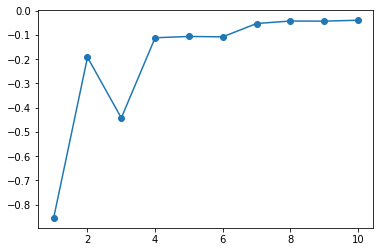

In [49]:
sns.set
plt.plot(list(range(1,11)),cv_scores, marker ='o')

*Try Modelling with best n_components = 9*

In [50]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
pca = PCA(n_components=9)
pca_transformer = pca.fit(x)
x_pca_8 = pca_transformer.transform(x)
x_train, x_test, y_train,y_test = train_test_split(x_pca_8,y,random_state=101)
model = XGBRegressor(random_state=101)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
mae = round(metrics.mean_absolute_error(y_test,prediction),2)
mse = round(metrics.mean_squared_error(y_test,prediction),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2)
print(f'Value Mean Absoute error : {mae}')
print(f'Value Mean squared error : {mse}')
print(f'Value Root Mean Squared Error :{rmse}')

[22:32:24] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Value Mean Absoute error : 166193.62
Value Mean squared error : 48063789607.07
Value Root Mean Squared Error :219234.55


>When the dataset predict use <b>Principal Components Analysis (One hot Encoding & Standard Scaller)</b> MAE score increase, so this algorithm will not be used

### Principal Components Analysis (Binary Encoding & Standard Scaller)

In [51]:
cv_scores = []
for item in range(1,11):
    x_pca = PCA(n_components=item).fit_transform(x2)
    cv_mean = cross_val_score(XGBRegressor(random_state=101),x_pca,y,cv=3).mean()
    cv_scores.append(cv_mean)

[22:32:28] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:29] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:30] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:31] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:33] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:32:34] WARNI

*Find Best n_components for modeling with Random Forest Regressor*

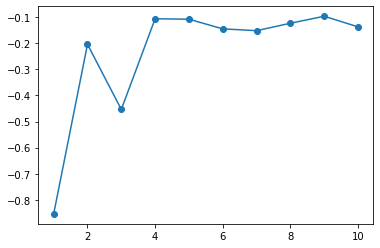

In [52]:
plt.plot(list(range(1,11)),cv_scores, marker ='o')

*Try Modelling with best n_components = 5*

In [53]:
pca = PCA(n_components=5)
pca_transformer = pca.fit(x2)
x_pca_5 = pca_transformer.transform(x2)
x_train, x_test, y_train,y_test = train_test_split(x_pca_5,y,random_state=101)
model = XGBRegressor(random_state=101)
model.fit(x_train,y_train)
prediction = model.predict(x_test)
mae = round(metrics.mean_absolute_error(y_test,prediction),2)
mse = round(metrics.mean_squared_error(y_test,prediction),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2)
print(f'Value Mean Absoute error : {mae}')
print(f'Value Mean squared error : {mse}')
print(f'Value Root Mean Squared Error :{rmse}')

[22:33:37] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Value Mean Absoute error : 174300.91
Value Mean squared error : 51273026342.43
Value Root Mean Squared Error :226435.48


>When the dataset predict use <b>Principal Components Analysis (One hot Encoding & Standard Scaller)</b> MAE score increase, so this algorithm will not be used

### Find Best Hyperparameter
From all algorithm, the best score for the model would be using <b> XGBRegressor </b> with processing <b>binary encoding</b> & <b>standard scaller</b>
> So, I will try find the bset hyper parameter for XGBRegressor using Grid Search CV

In [54]:
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, train_test_split, KFold,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn import metrics

parameter = {'max_depth' : [1,2,3,4,5], 'learning_rate' : [0.1,0.2,0.3]}
x_train,x_test, y_train,y_test = train_test_split(x2,y,random_state=101)
grid_search_cv = GridSearchCV(XGBRegressor(random_state=101),parameter, cv=3)
grid_search_cv.fit(x_train,y_train)
grid_search_cv.best_params_

[22:33:39] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:42] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:45] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:48] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:53] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:33:57] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:34:02] WARNI

{'learning_rate': 0.1, 'max_depth': 5}

> Best Hyperparameter for the model <b>(XGBRegressor)</b> with <b> max_depth = 5 </b> & <b> learning_rate = 0.1 </b> 

### Modelling with Best Hyper Parameter

After finding best hyperparameter, input the hypterparameter to the model for optimalization the prediction of price.
Step for find best score with hyperparameter.
* Train Test split
* Kfold

## Train Test Split

In [55]:
x_train,x_test, y_train,y_test = train_test_split(x2,y,random_state=101)

In [56]:
model_1 = XGBRegressor(n_estimators=500,max_depth=5, learning_rate=0.1, random_state=101)

In [57]:
model_1.fit(x_train,y_train)
prediction = model_1.predict(x_test)
mae = round(metrics.mean_absolute_error(y_test,prediction),2)
rmse = round(np.sqrt(metrics.mean_squared_error(y_test, prediction)),2)
print(f'Value MAE : {mae}')
print(f'Value RMSE : {rmse}')

[22:41:34] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
Value MAE : 140384.46
Value RMSE : 192741.11


***This graph explain about distribution of prediction from model vs real target (y_test)***

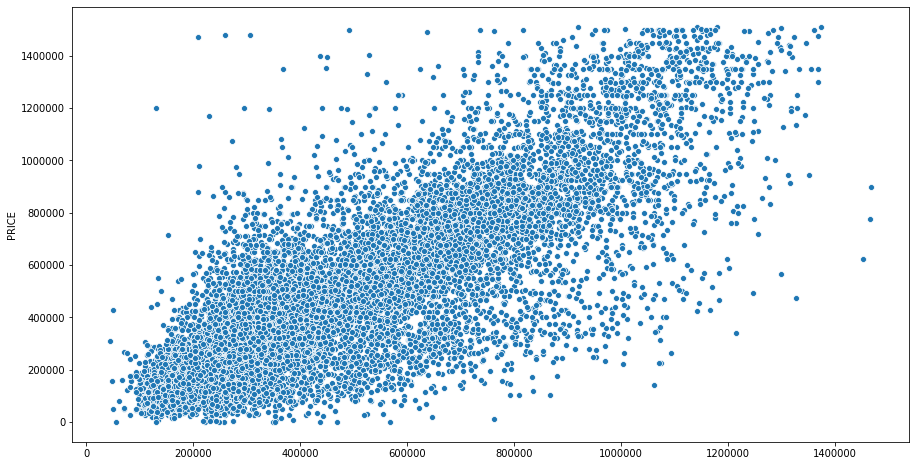

In [58]:
plt.figure(figsize=(15,8))
sns.scatterplot(prediction,y_test)
plt.show()

## KFold

In [59]:
rmse = []
mae = []
r2_score = []
kf = KFold(n_splits=10, random_state=101, shuffle=True)
for train_index, test_index in kf.split(x2,y):
    x_train,x_test = x2.iloc[train_index],x2.iloc[test_index]
    y_train, y_test = y.iloc[train_index],y.iloc[test_index]
    model_1.fit(x_train,y_train)
    predictions = model_1.predict(x_test) 
    mae.append(round(mean_absolute_error(y_test,predictions),2))
    rmse.append(round(np.sqrt(mean_squared_error(y_test,predictions)),2))
temp = [
    round(sum(mae)/10,2),
    round(sum(rmse)/10,2),
]

[22:42:32] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:43:40] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:44:47] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:45:56] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:47:03] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:48:11] WARNING: C:/Jenkins/workspace/xgboost-win64_release_0.90/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
[22:49:19] WARNI

In [60]:
print(f'Value MAE : {temp[0]}')
print(f'Value RMSE : {temp[1]}')

Value MAE : 139968.39
Value RMSE : 192745.15


***This graph explain about distribution of prediction from model vs real target (y_test)***

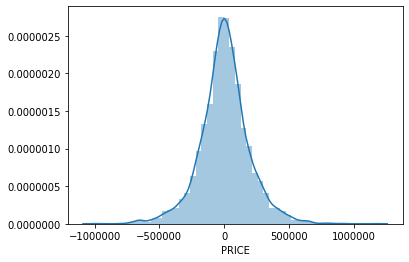

In [97]:
prediction = model_1.predict(x_test)
residual = y_test - prediction

sns.distplot(residual)

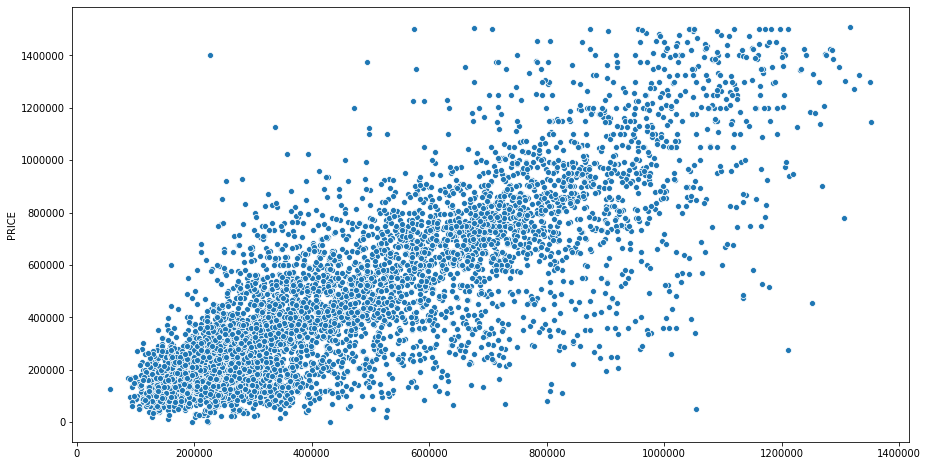

In [61]:
plt.figure(figsize=(15,8))
sns.scatterplot(predictions,y_test)
plt.show()

> The conclusion about modelling is using XGBRegressor with processing binary encoding, standard scaller & Kfold method for the best score of MAE & RMSE.

## Feature Importances

**Feature importance** is calculated as the decrease in node impurity weighted by the probability of reaching that node. The higher the value the more important the feature.

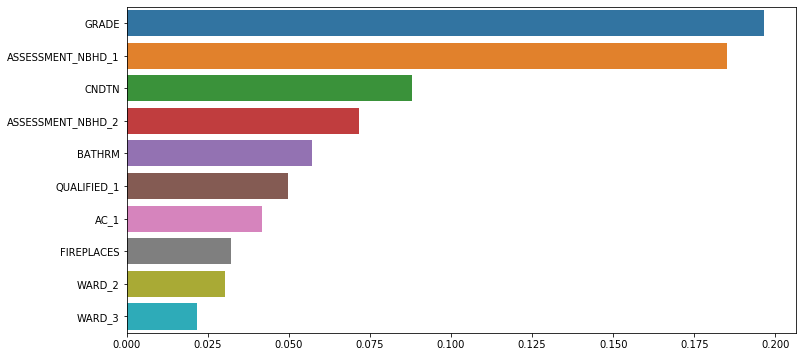

In [62]:
plt.figure(figsize=(12,6))
feature_importance = pd.Series(model_1.feature_importances_,index=x2.columns).sort_values(ascending=False).head(10)
sns.barplot(x=feature_importance.values , y = feature_importance.index)
plt.show()

## Export Model

In [63]:
import pickle

In [64]:
filename = 'finalized_model.sav'
pickle.dump(model_1, open(filename, 'wb'))

In [65]:
filename = 'encoder_features.sav'
pickle.dump(encoder_transformer, open(filename,'wb'))

In [66]:
filename = 'scaller_features.sav'
pickle.dump(scaler_transformer, open(filename,'wb'))